# Checking classical force and the orbit of mercury in two-body system

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [14]:
poss = np.loadtxt("../positions/mercury.txt")

<IPython.core.display.Javascript object>


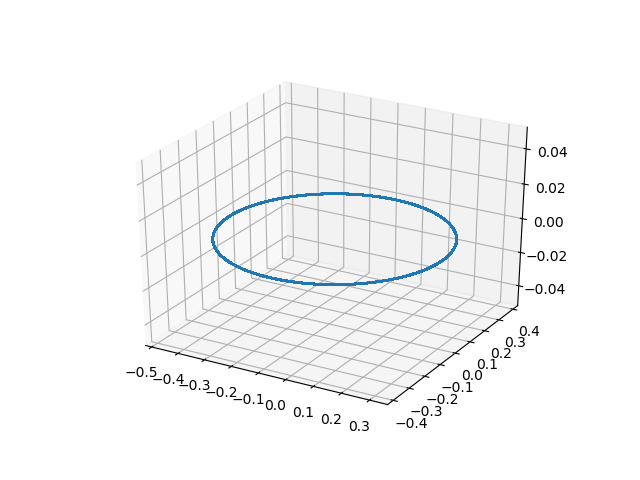

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(poss[0, :], poss[1, :], poss[2, :])
plt.show()

In [35]:
rposs = np.linalg.norm(poss, 2, axis=0)
local_maxima_idx = argrelextrema(rposs, np.less)

for lmi in local_maxima_idx:
    print(rposs[lmi])

[0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.3075     0.3075     0.3075     0.3075
 0.3075     0.3075     0.30749999 0.3075     0.3075     0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999
 0.30749999 0.30749999 0.30749999 0.30749999 0.30749999 0.30749998
 0.30749998 0.30749998 0.30